## 2.1 Import Library

In [1]:
# 1. Import Library

import pandas as pd
import numpy as np

# Visualisasi & Evaluasi
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve
)

## 2.2 Load Dataset

In [2]:
import pandas as pd

df = pd.read_csv("heart.csv")

df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2.3 Data Structure Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
df.shape

(918, 12)

In [5]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## 2.4 Data Type (Numeric & Categorikal)

In [6]:
num_cols = [
    "Age", "RestingBP", "Cholesterol",
    "MaxHR", "Oldpeak"
]

cat_cols = [
    "Sex", "ChestPainType", "RestingECG",
    "ExerciseAngina", "ST_Slope", "FastingBS"
]

target = "HeartDisease"

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)
print("Target Column:", target)

Numeric Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
Target Column: HeartDisease


## 2.5 Missing Value Analysis

In [7]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_table = pd.DataFrame({
    "Missing Values": missing_values,
    "Percentage (%)": missing_percentage
})

print("=== Missing Value Analysis ===")
missing_table

=== Missing Value Analysis ===


,Missing Values,Percentage (%)
Age,0,0.0
Sex,0,0.0
ChestPainType,0,0.0
RestingBP,0,0.0
Cholesterol,0,0.0
FastingBS,0,0.0
RestingECG,0,0.0
MaxHR,0,0.0
ExerciseAngina,0,0.0
Oldpeak,0,0.0


## 2.6 Duplicate Check

In [8]:
duplicate_count = df.duplicated().sum()
print("Jumlah data duplikat:", duplicate_count)

if duplicate_count > 0:
    display(df[df.duplicated()])

Jumlah data duplikat: 0


## 2.7 Decriptive Statistic

In [9]:
# 2Descriptive Statistic Numeric

print("=== Descriptive Statistics for Numeric Features ===")
df[num_cols].describe().T

=== Descriptive Statistics for Numeric Features ===


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2


In [10]:
# Kategorikal
print("=== Descriptive Statistics for Categorical Features ===")
df[cat_cols].describe().T


=== Descriptive Statistics for Categorical Features ===


,count,mean,std,min,25%,50%,75%,max
FastingBS,918.0,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0


## 2.8 Distribution Analysis

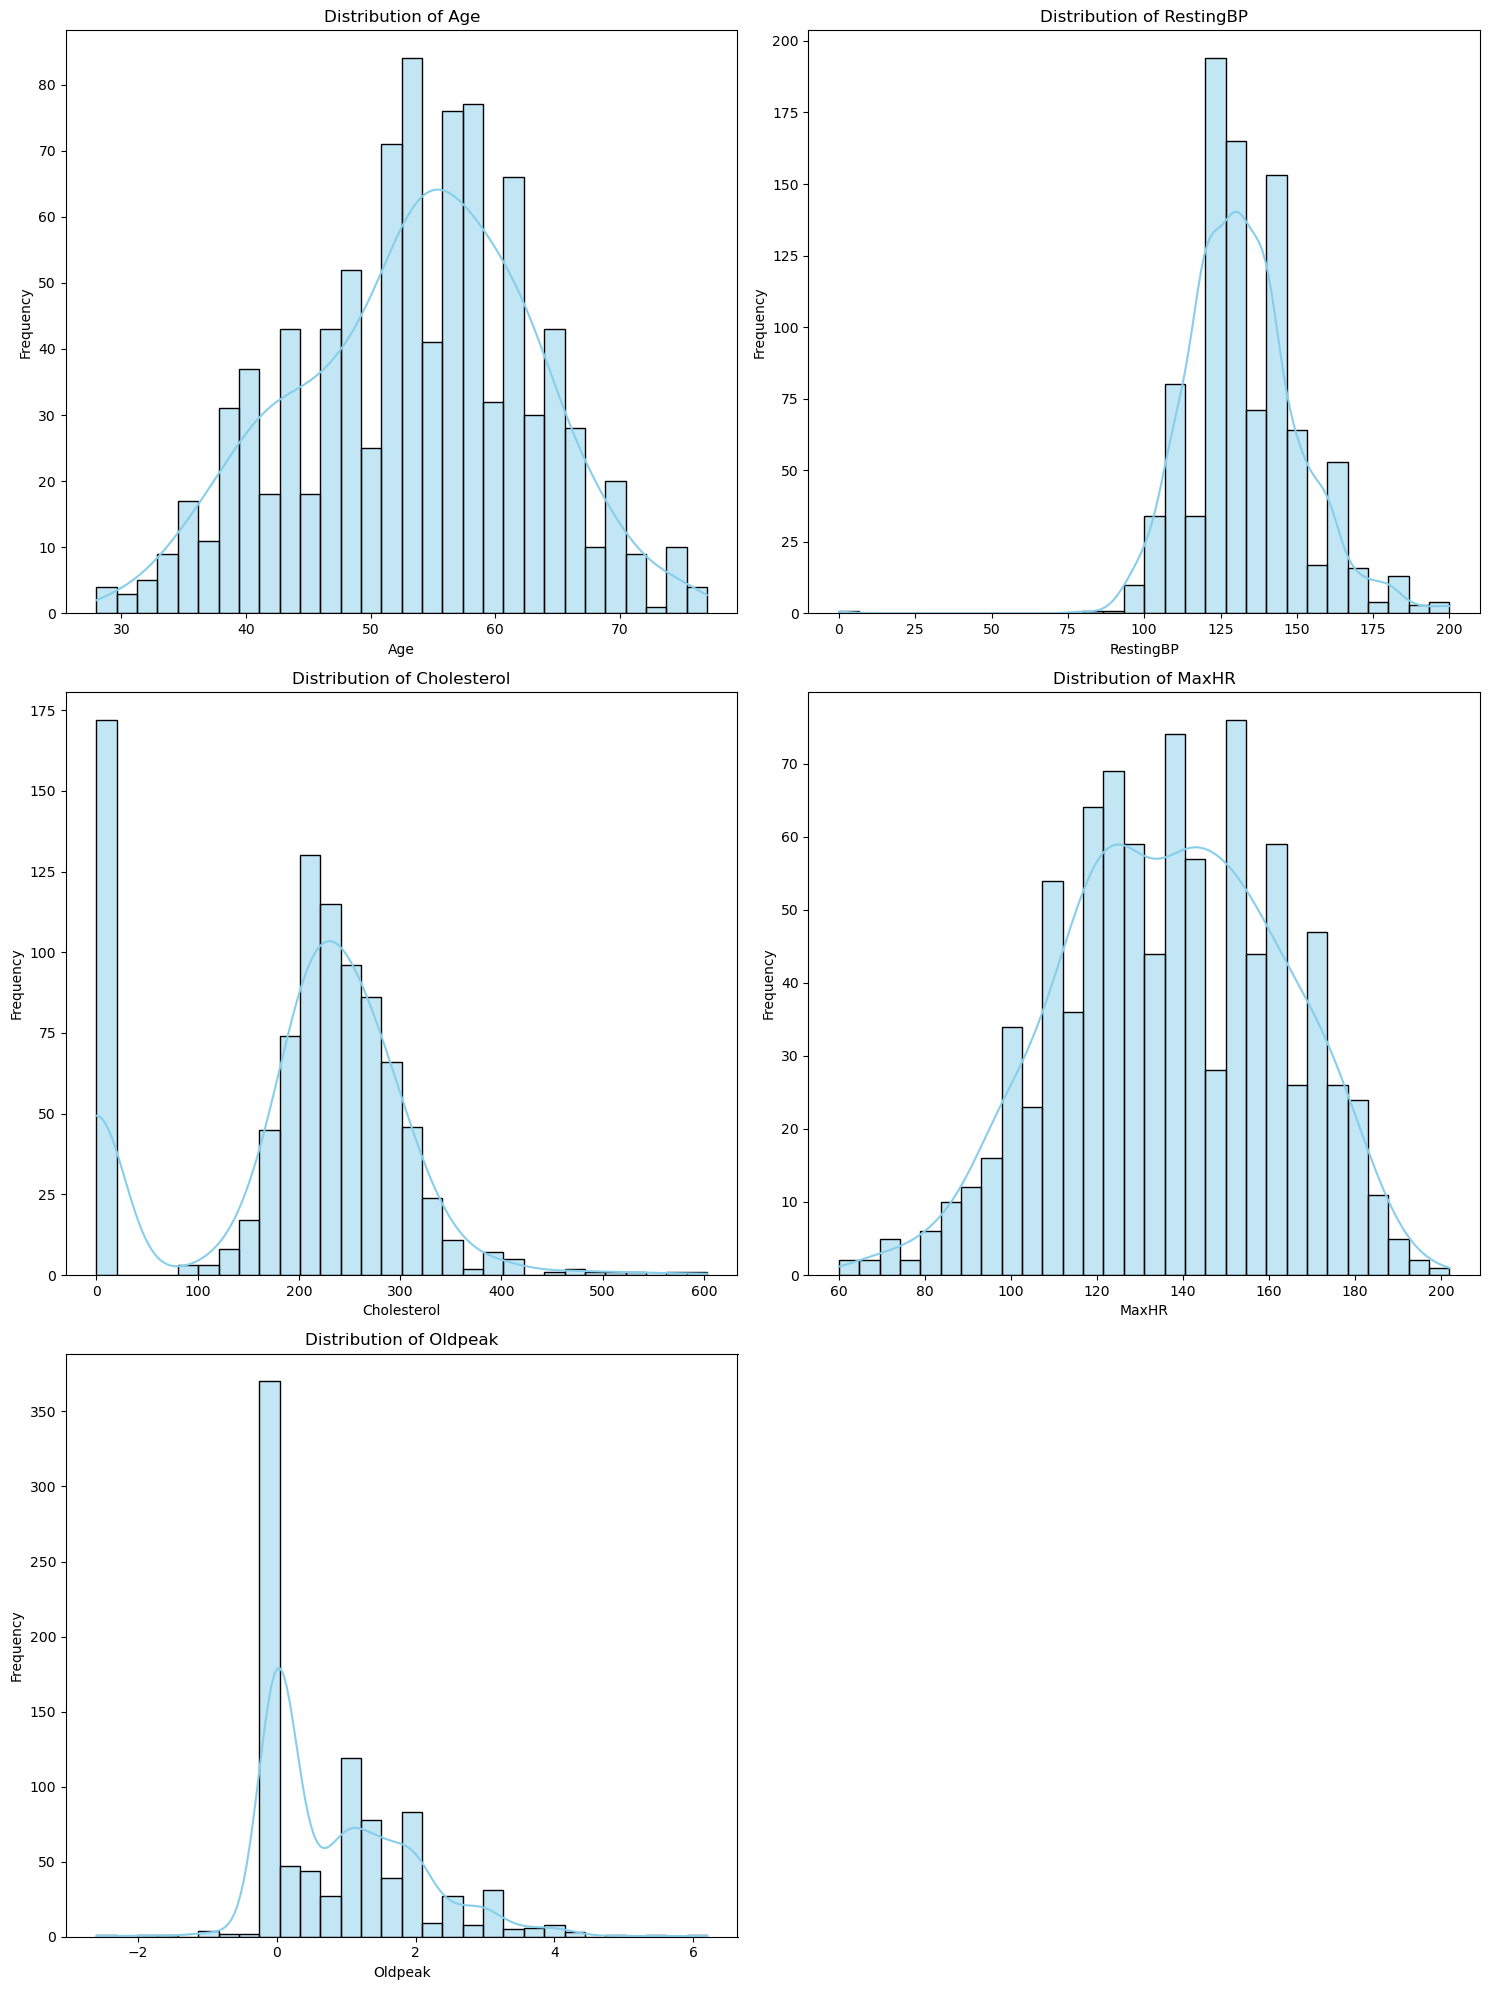

In [11]:
# Distribution Analysis

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

## 2.9 Skewness Check

In [12]:
# Skewness Check

print("=== Skewness of Numerical Features ===")
skew_values = df[num_cols].skew().sort_values(ascending=False)
skew_values

skew_table = pd.DataFrame({
    "Feature": skew_values.index,
    "Skewness": skew_values.values
})

skew_table

=== Skewness of Numerical Features ===


,Feature,Skewness
0,Oldpeak,1.022872
1,RestingBP,0.179839
2,MaxHR,-0.144359
3,Age,-0.195933
4,Cholesterol,-0.610086


## 2.10 Outlier Detection

In [13]:
# Outlier Detection using IQR Method

outlier_summary = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)

outlier_table = pd.DataFrame.from_dict(
    outlier_summary, orient='index', columns=['Outlier Count']
)

outlier_table.sort_values(by="Outlier Count", ascending=False)

,Outlier Count
Cholesterol,183
RestingBP,28
Oldpeak,16
MaxHR,2
Age,0


## 2.11 Boxplot Numerical Feature

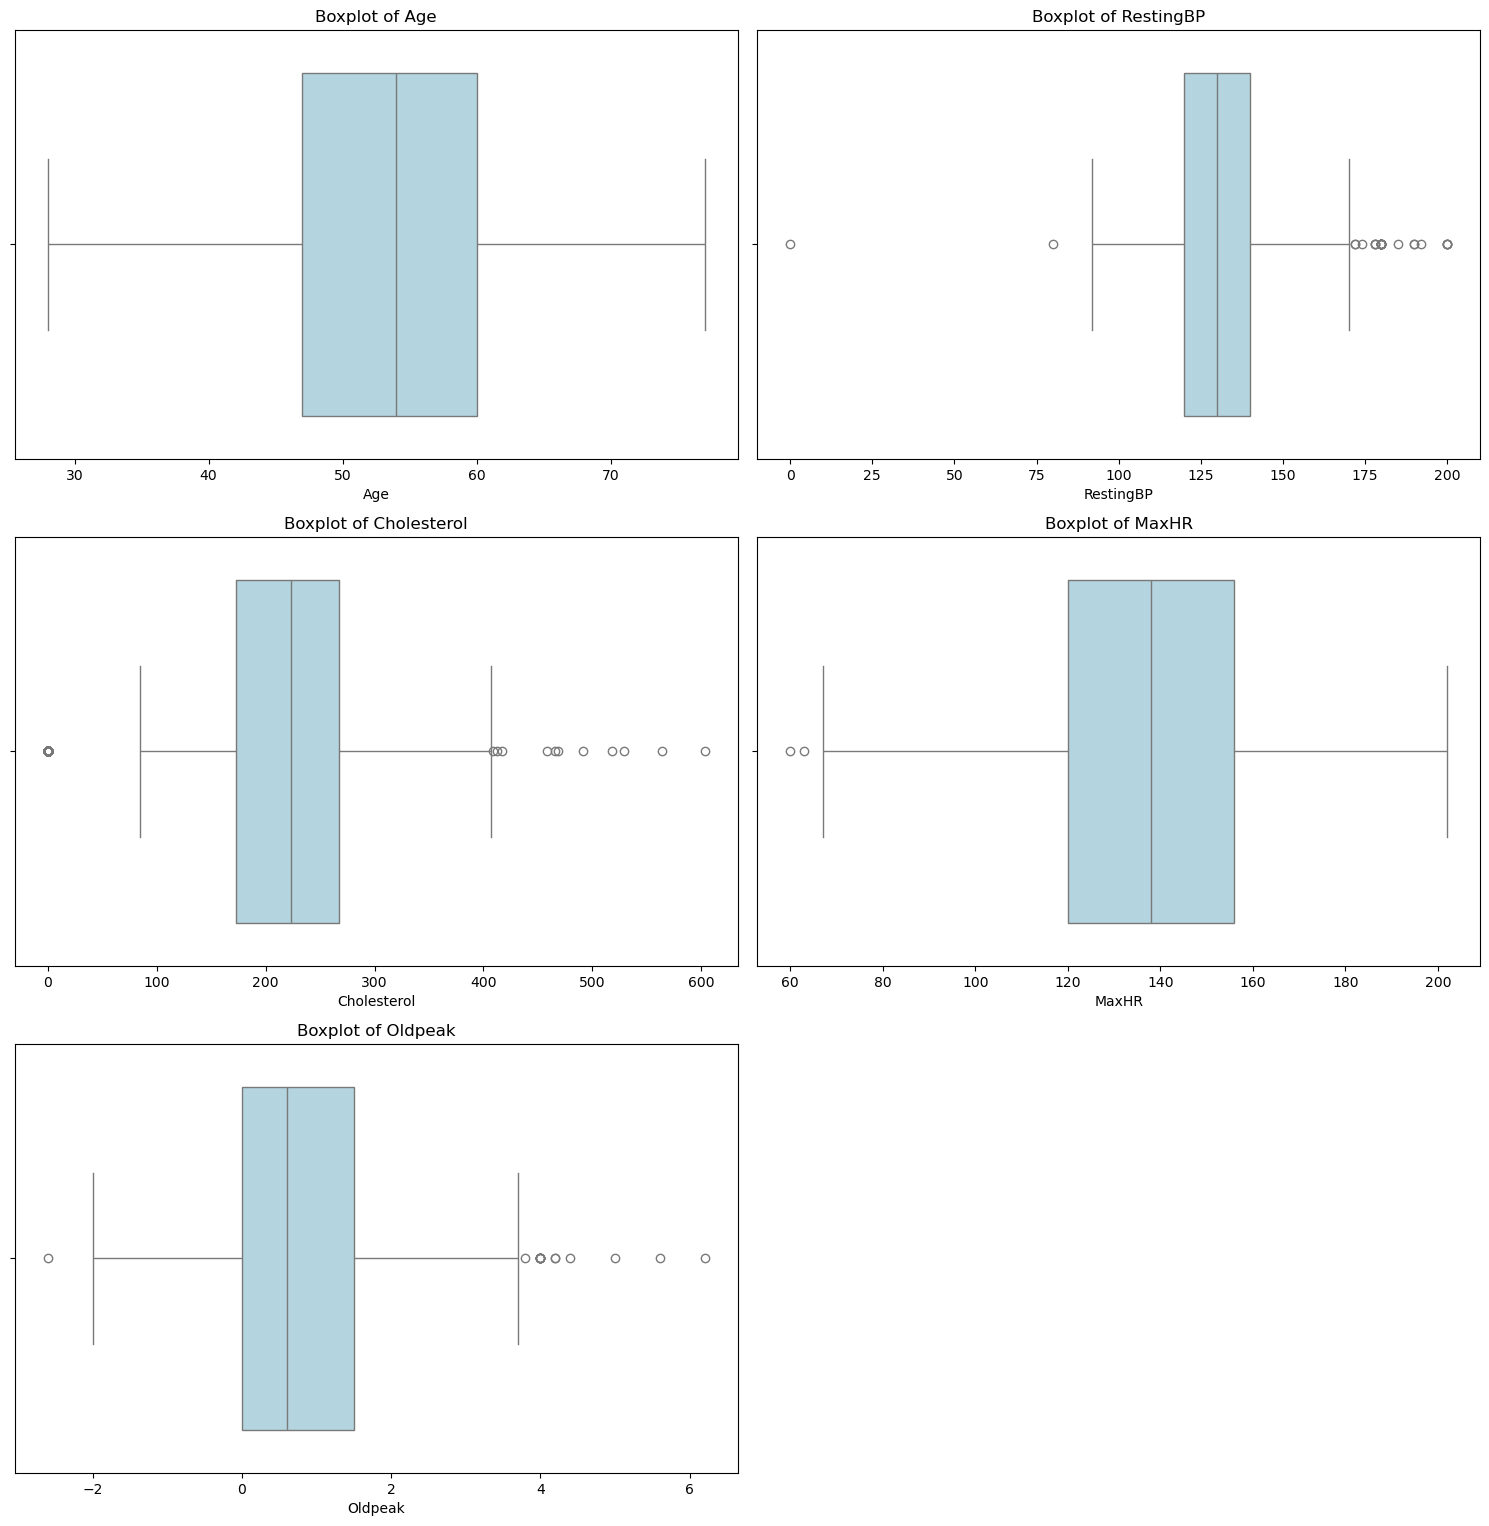

In [14]:
# Boxplot Numerical Features

plt.figure(figsize=(15, 20))

for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

### All numeric boxplots in single figure

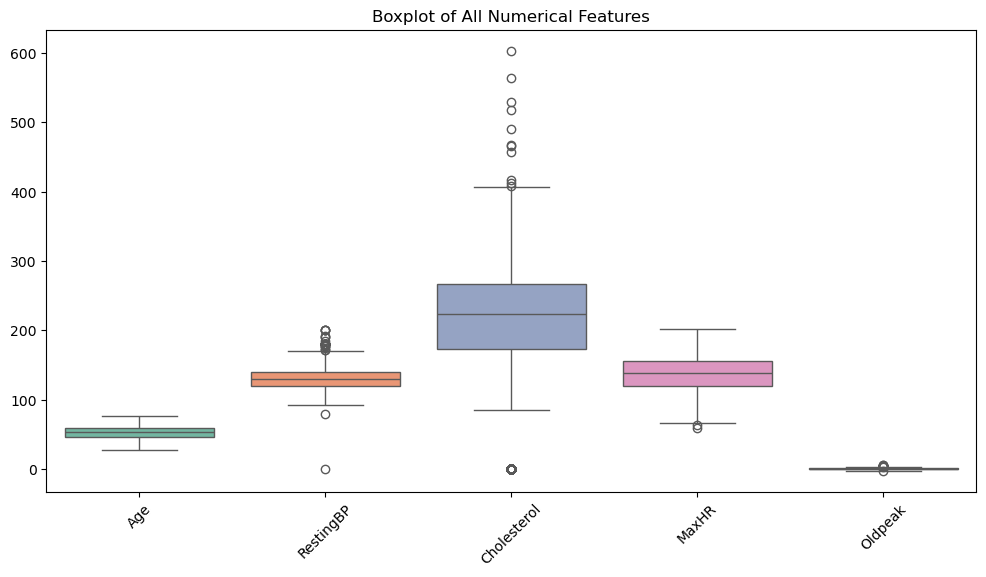

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[num_cols], palette="Set2")
plt.title("Boxplot of All Numerical Features")
plt.xticks(rotation=45)
plt.show()

## 2.12 Correlation Analysis

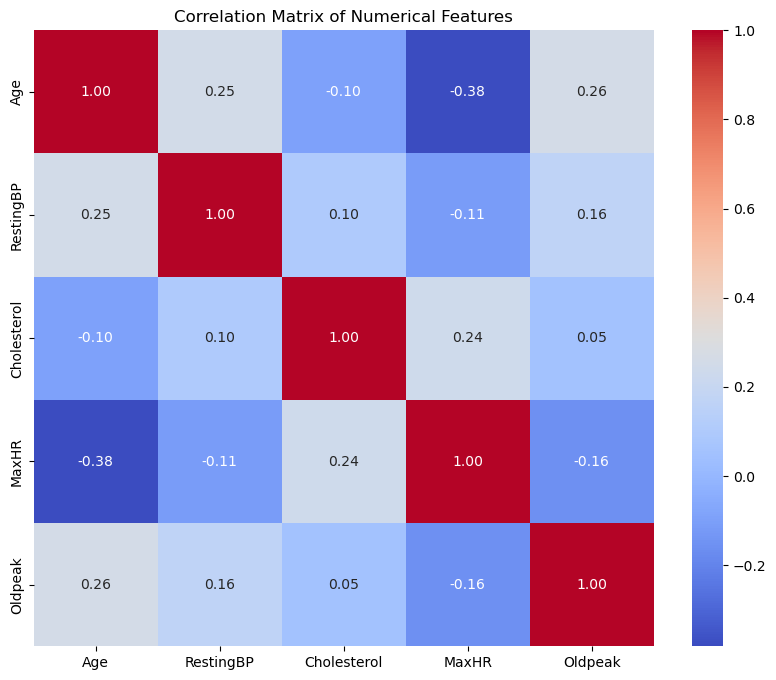

In [16]:
# Numeric Correlation (Heatmap)

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 2.13 Target Imbalance Check

=== Class Distribution (Counts) ===
HeartDisease
1    508
0    410
Name: count, dtype: int64

=== Class Distribution (Percentage) ===
HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64


C:\Users\USER\AppData\Local\Temp\ipykernel_3408\510208011.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target, palette="coolwarm")


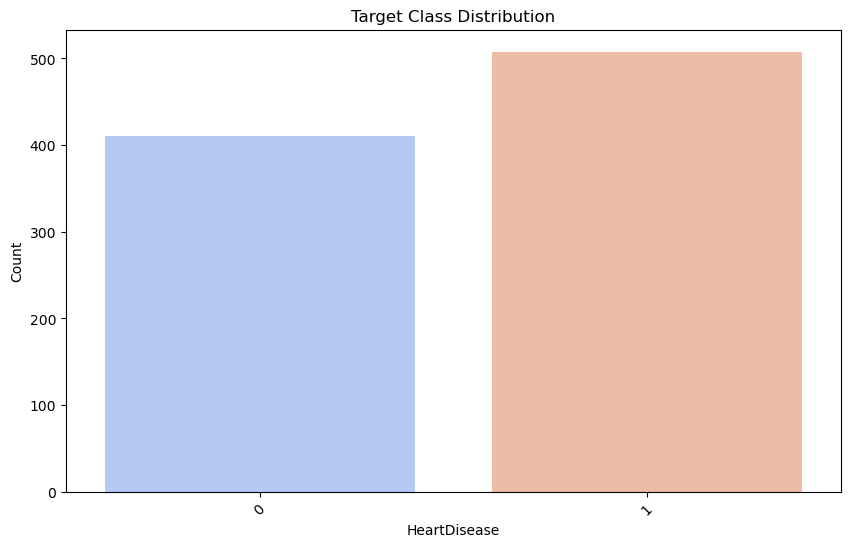

In [17]:
# Target Imbalance Check

# Hitung jumlah setiap kelas
class_counts = df[target].value_counts()

# Hitung persentase setiap kelas
class_percent = df[target].value_counts(normalize=True) * 100

print("=== Class Distribution (Counts) ===")
print(class_counts)
print("\n=== Class Distribution (Percentage) ===")
print(class_percent)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x=target, palette="coolwarm")
plt.title("Target Class Distribution")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.show()

## 2.14 Numerical vs Target Relation (Boxplot)

C:\Users\USER\AppData\Local\Temp\ipykernel_3408\1599654997.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_3408\1599654997.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_3408\1599654997.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=target, y=col, palette="coolwarm")
C:\Users\USER\AppData\Local\Temp\ipykernel_3408\1599654997.py:5: FutureWarni

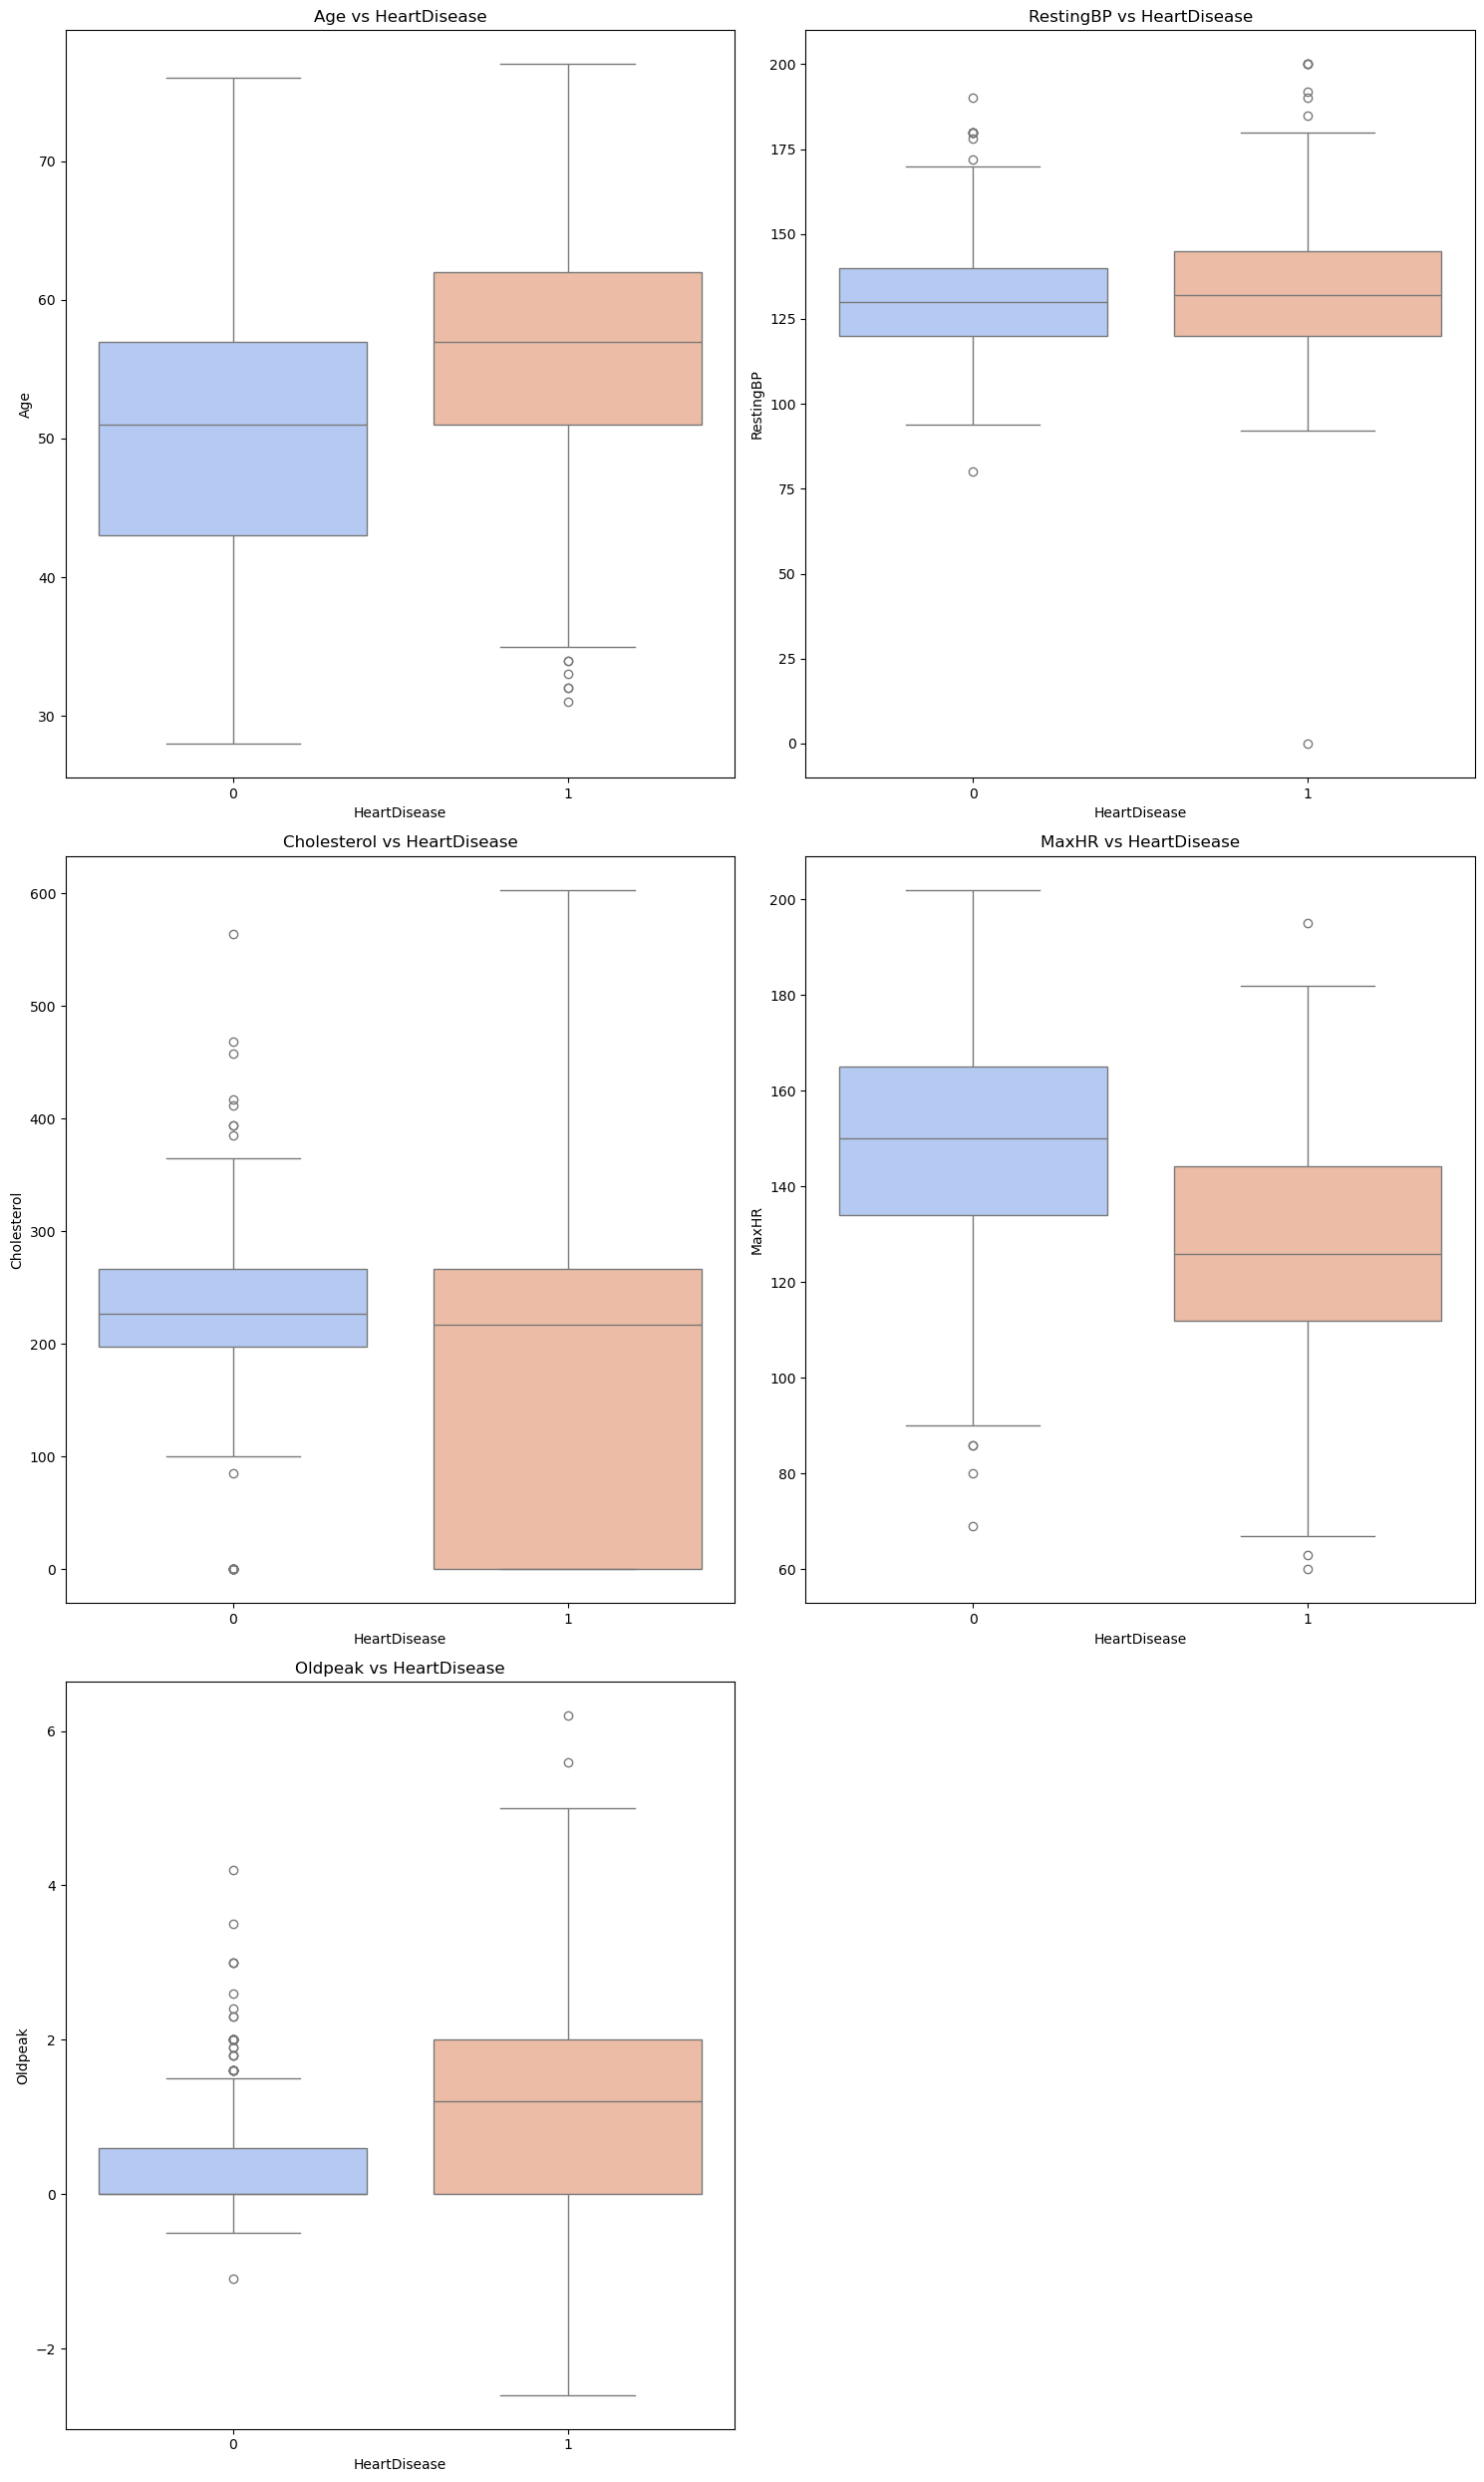

In [18]:
plt.figure(figsize=(15,25))

for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=target, y=col, palette="coolwarm")
    plt.title(f"{col} vs HeartDisease")

plt.tight_layout()
plt.show()

## 2.15 Categorical vs Target Relation

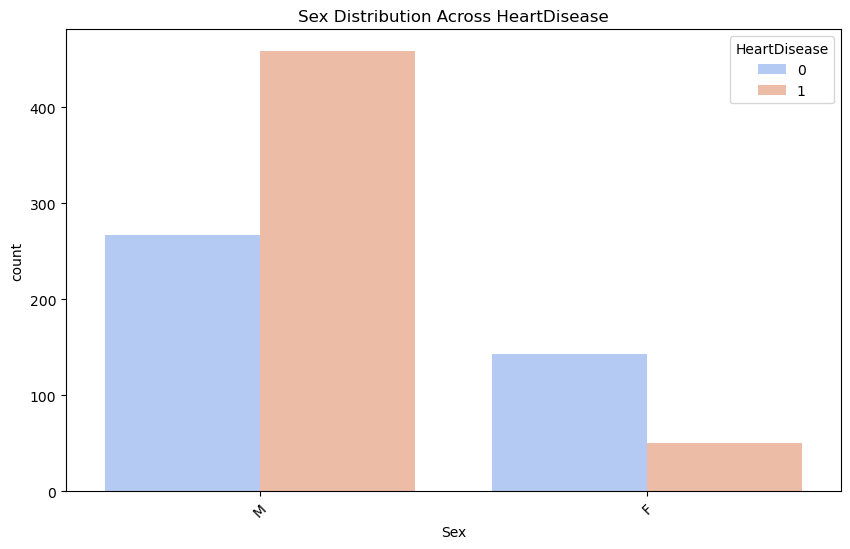

=== Crosstab (Counts) for Sex ===
HeartDisease    0    1
Sex                   
F             143   50
M             267  458

=== Crosstab (Percentage) for Sex ===
HeartDisease          0          1
Sex                               
F             74.093264  25.906736
M             36.827586  63.172414


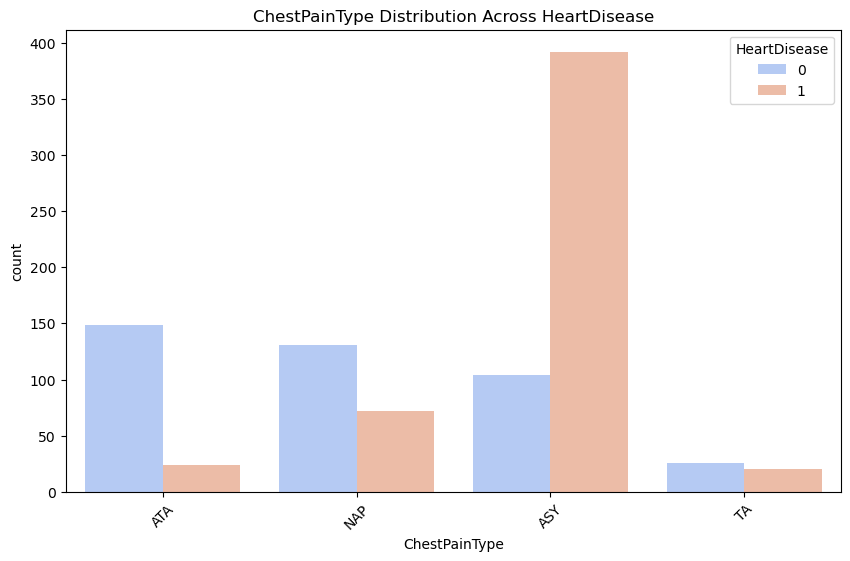

=== Crosstab (Counts) for ChestPainType ===
HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20

=== Crosstab (Percentage) for ChestPainType ===
HeartDisease           0          1
ChestPainType                      
ASY            20.967742  79.032258
ATA            86.127168  13.872832
NAP            64.532020  35.467980
TA             56.521739  43.478261


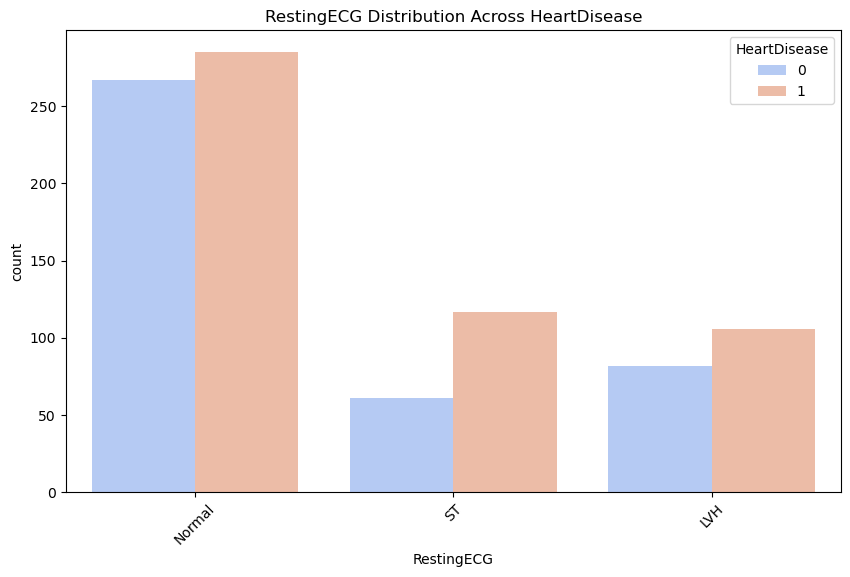

=== Crosstab (Counts) for RestingECG ===
HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  285
ST             61  117

=== Crosstab (Percentage) for RestingECG ===
HeartDisease          0          1
RestingECG                        
LVH           43.617021  56.382979
Normal        48.369565  51.630435
ST            34.269663  65.730337


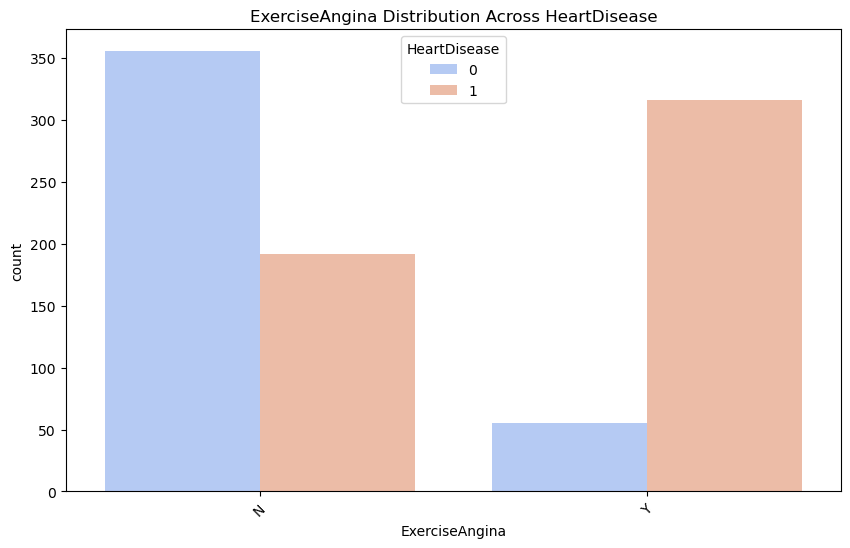

=== Crosstab (Counts) for ExerciseAngina ===
HeartDisease      0    1
ExerciseAngina          
N               355  192
Y                55  316

=== Crosstab (Percentage) for ExerciseAngina ===
HeartDisease            0          1
ExerciseAngina                      
N               64.899452  35.100548
Y               14.824798  85.175202


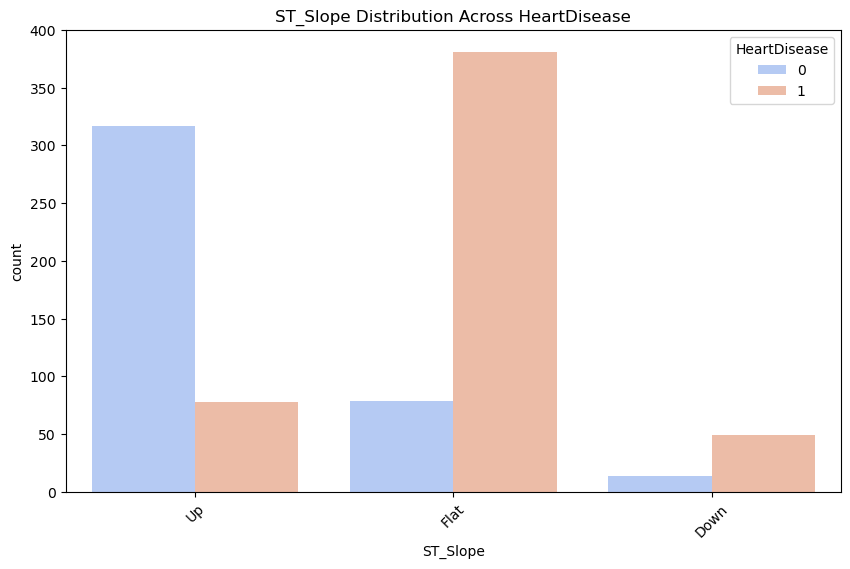

=== Crosstab (Counts) for ST_Slope ===
HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  381
Up            317   78

=== Crosstab (Percentage) for ST_Slope ===
HeartDisease          0          1
ST_Slope                          
Down          22.222222  77.777778
Flat          17.173913  82.826087
Up            80.253165  19.746835


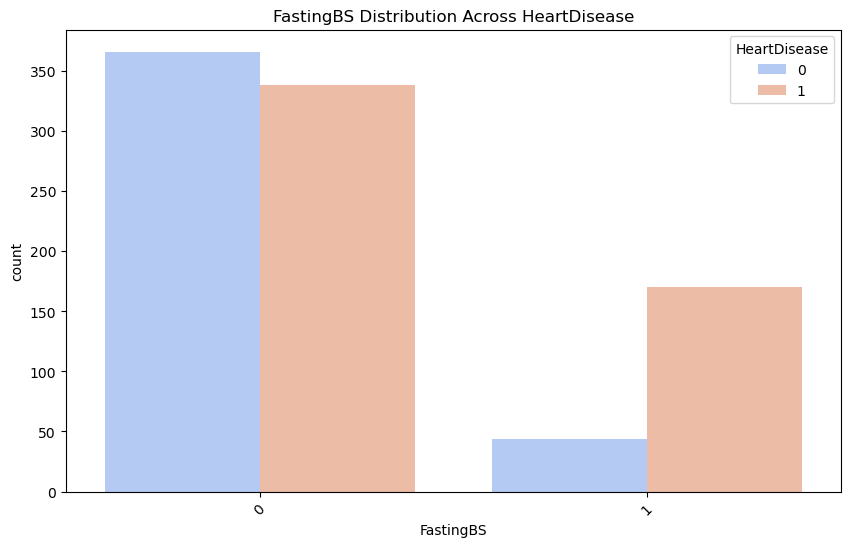

=== Crosstab (Counts) for FastingBS ===
HeartDisease    0    1
FastingBS             
0             366  338
1              44  170

=== Crosstab (Percentage) for FastingBS ===
HeartDisease          0          1
FastingBS                         
0             51.988636  48.011364
1             20.560748  79.439252


In [19]:
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=target, palette="coolwarm")
    plt.title(f"{col} Distribution Across HeartDisease")
    plt.xticks(rotation=45)
    plt.show()

    ct = pd.crosstab(df[col], df[target])
    ct_pct = pd.crosstab(df[col], df[target], normalize="index") * 100

    print(f"=== Crosstab (Counts) for {col} ===")
    print(ct)

    print(f"\n=== Crosstab (Percentage) for {col} ===")
    print(ct_pct)

# DATA PREPROCESSING

## 3.1 Column Removal

In [20]:
# Column Removal

df_prep = df.copy()

cols_to_drop = []

df_prep = df_prep.drop(columns=cols_to_drop, errors='ignore')

print("Columns removed:", cols_to_drop)
print(df_prep.head())

Columns removed: []
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


## 3.2 Categorizing Feature

In [21]:
# Categorizing Features

num_cols = [
    "Age", "RestingBP", "Cholesterol",
    "MaxHR", "Oldpeak"
]

cat_cols = [
    "Sex", "ChestPainType", "RestingECG",
    "ExerciseAngina", "ST_Slope", "FastingBS"
]

target = "HeartDisease"

print("Numeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)
print("Target Column:", target)

Numeric Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Categorical Columns: ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']
Target Column: HeartDisease


## 3.3 Handling Missing Values & Duplicate Values

In [22]:
# Handling Missing & Duplicate Values

# Missing values
missing_before = df_prep.isnull().sum()
df_prep = df_prep.dropna()
missing_after = df_prep.isnull().sum()

# Duplicates
dup_before = df_prep.duplicated().sum()
df_prep = df_prep.drop_duplicates()
dup_after = df_prep.duplicated().sum()

print("Missing Before:\n", missing_before)
print("Missing After:\n", missing_after)
print("\nDuplicates Before:", dup_before)
print("Duplicates After:", dup_after)

Missing Before:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
Missing After:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Duplicates Before: 0
Duplicates After: 0


## 3.4 ENCODING (LabelEncoder + TargetEncoder)

In [23]:
# Encoding

from sklearn.preprocessing import LabelEncoder

df_encoded = df_prep.copy()

# Encode categorical feature
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    le_dict[col] = le

# Encode target
le_target = LabelEncoder()
df_encoded[target] = le_target.fit_transform(df_encoded[target])

print("Updated target distribution:")
print(df_encoded[target].value_counts())

df_encoded.head()

Updated target distribution:
HeartDisease
1    508
0    410
Name: count, dtype: int64


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


## 3.5 Handling Outlier

In [24]:
# Handling Outliers (IQR Winsorization)

df_out = df_encoded.copy()

for col in num_cols:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_out[col] = df_out[col].clip(lower, upper)

print("Outlier sukses!")


Outlier sukses!


## 3.6 Distribution After Encoding

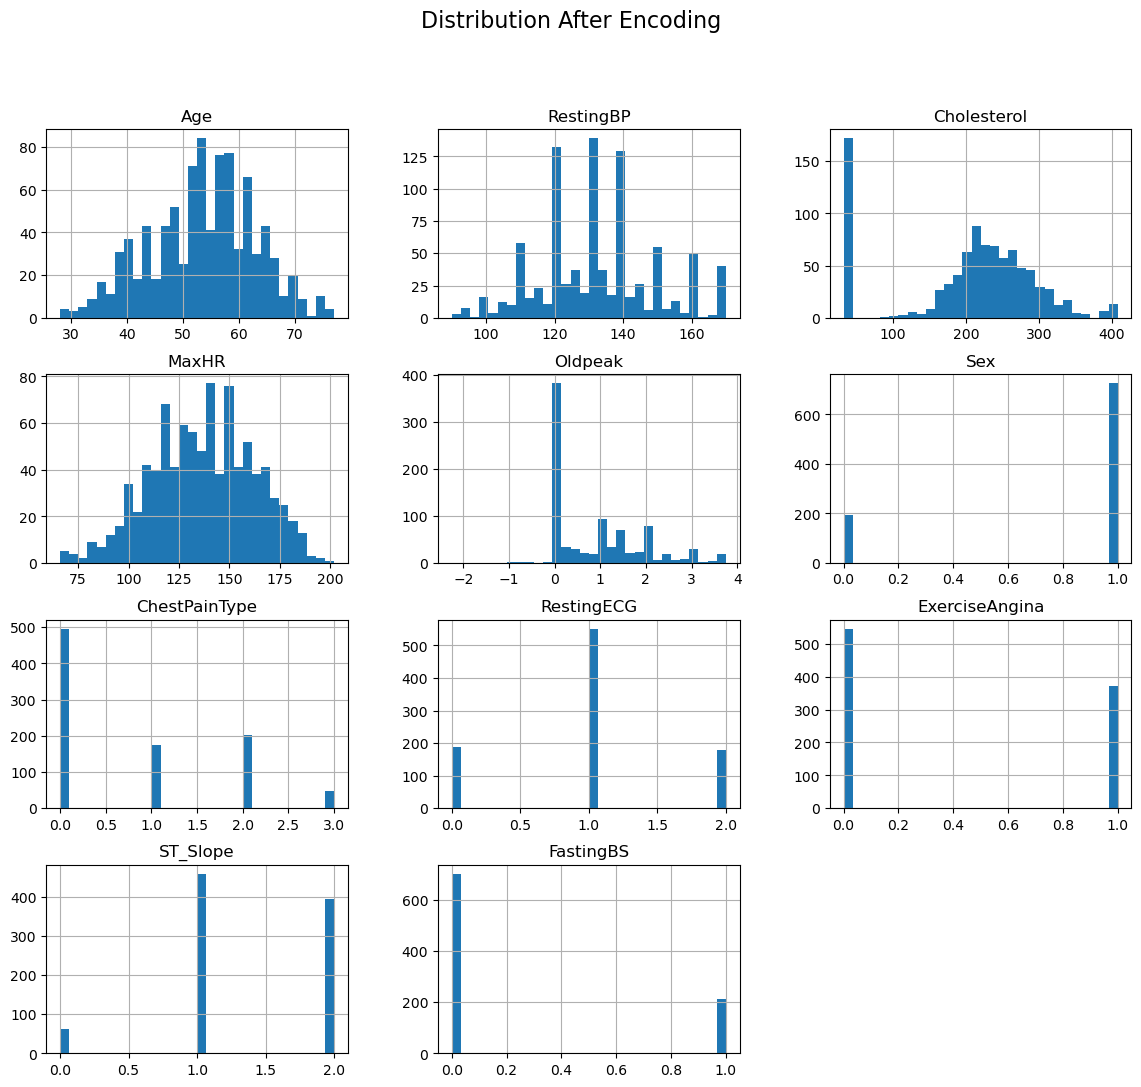

In [25]:
# Distribution After Encoding

df_out[num_cols + cat_cols].hist(figsize=(14, 12), bins=30)
plt.suptitle("Distribution After Encoding", fontsize=16)
plt.show()

## 3.7 Correlation After Encoding

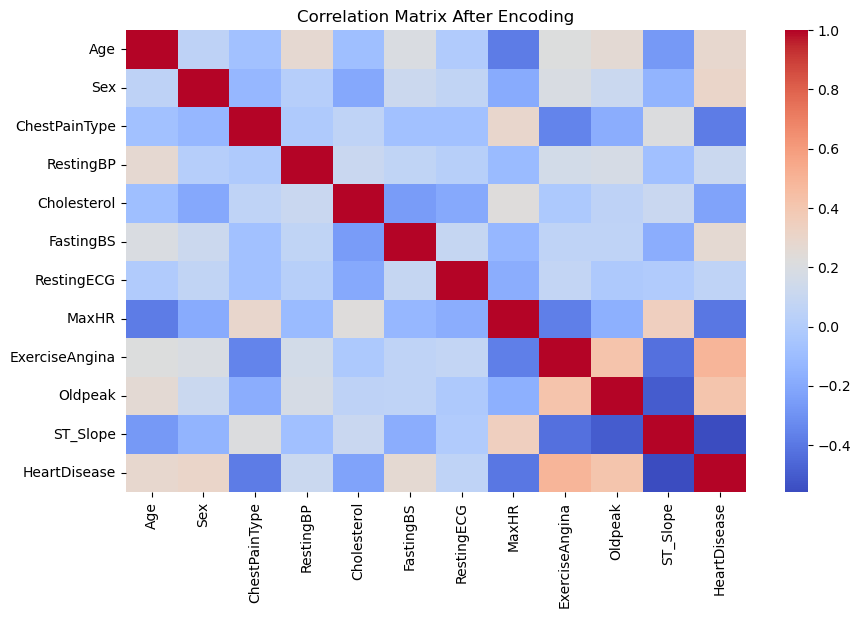

In [26]:
# Correlation After Encoding

plt.figure(figsize=(10, 6))
sns.heatmap(df_out.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix After Encoding")
plt.show()

## 3.8 Standardization (Standard Scaler)

In [27]:
# 3.8 Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = df_out.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

df_scaled.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.463654,0.886771,0,1,1.384080,0,-0.851276,2,0
1,-0.478484,0,2,1.641229,-0.250184,0,1,0.754610,0,0.118532,1,1
2,-1.751359,1,1,-0.125133,0.824187,0,2,-1.527219,0,-0.851276,2,0
3,-0.584556,0,0,0.345897,0.104463,0,1,-1.133801,1,0.603436,1,1
4,0.051881,1,2,1.052442,-0.093722,0,1,-0.583014,0,-0.851276,2,0


## 3.9 Train Test Split

In [28]:
# 3.9 Train-Test Split (80/20)

from sklearn.model_selection import train_test_split

X = df_scaled.drop(columns=[target])
y = df_scaled[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (734, 11)
Test shape: (184, 11)


# MODELING

## 4.1 Logistic Regression (Multiclass Baseline)


===== Logistic Regression (Baseline) =====
Training Accuracy : 0.8569
Testing Accuracy  : 0.8750
Precision (macro) : 0.8800
Recall (macro)    : 0.8681
F1-Score (macro)  : 0.8718
ROC-AUC           : 0.8969
CV F1 Macro Mean  : 0.8454
CV F1 Macro STD   : 0.0350

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.90      0.80      0.85        82
           1       0.86      0.93      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



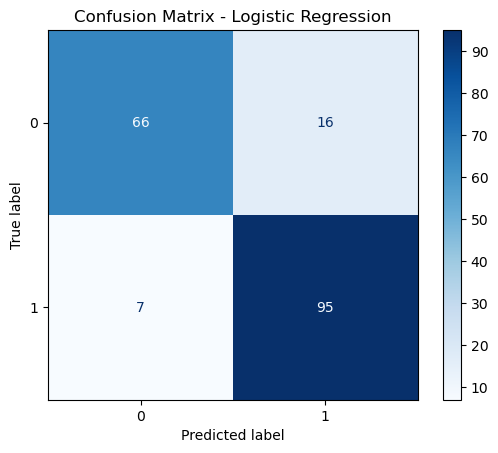

In [29]:
# Logistic Regression (Baseline)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay
)
from sklearn.model_selection import cross_val_score

X_train_scaled = X_train
X_test_scaled = X_test

logreg = LogisticRegression(
    max_iter=500,
    solver='lbfgs'
)

# Train
logreg.fit(X_train_scaled, y_train)

# Predict
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Probabilities
y_test_proba = logreg.predict_proba(X_test_scaled)

# Evaluation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_proba[:,1])

# Cross-validation
cv_scores = cross_val_score(
    logreg, X_train_scaled, y_train,
    cv=5, scoring='f1_macro'
)

print("\n===== Logistic Regression (Baseline) =====")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")
print(f"Precision (macro) : {precision:.4f}")
print(f"Recall (macro)    : {recall:.4f}")
print(f"F1-Score (macro)  : {f1:.4f}")
print(f"ROC-AUC           : {roc_auc:.4f}")
print(f"CV F1 Macro Mean  : {cv_scores.mean():.4f}")
print(f"CV F1 Macro STD   : {cv_scores.std():.4f}")

print("\n=== Classification Report ===")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


## 4.2 KNN


===== KNN (Baseline) =====
Training Accuracy : 1.0000
Testing Accuracy  : 0.8804
Precision (macro) : 0.8798
Recall (macro)    : 0.8778
F1-Score (macro)  : 0.8787
ROC-AUC           : 0.9230
CV F1 Macro Mean  : 0.8331
CV F1 Macro STD   : 0.0204


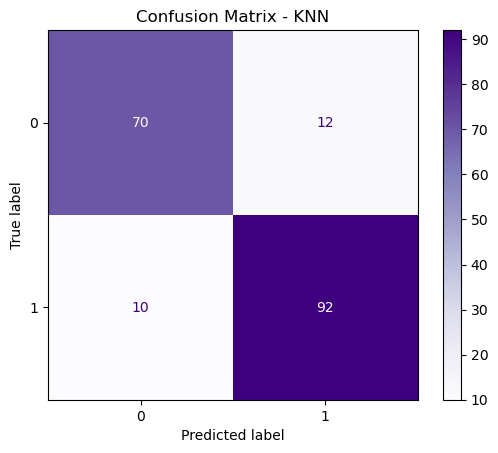

In [30]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    metric='minkowski',
    p=2
)

knn.fit(X_train_scaled, y_train)

y_train_pred = knn.predict(X_train_scaled)
y_test_pred = knn.predict(X_test_scaled)
y_test_proba = knn.predict_proba(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_proba[:,1])

cv_scores = cross_val_score(
    knn, X_train_scaled, y_train,
    cv=5, scoring='f1_macro'
)

print("\n===== KNN (Baseline) =====")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")
print(f"Precision (macro) : {precision:.4f}")
print(f"Recall (macro)    : {recall:.4f}")
print(f"F1-Score (macro)  : {f1:.4f}")
print(f"ROC-AUC           : {roc_auc:.4f}")
print(f"CV F1 Macro Mean  : {cv_scores.mean():.4f}")
print(f"CV F1 Macro STD   : {cv_scores.std():.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Purples")
plt.title("Confusion Matrix - KNN")
plt.show()


## 4.3 Decision Tree


===== Decision Tree (Baseline) =====
Training Accuracy : 1.0000
Testing Accuracy  : 0.7880
Precision (macro) : 0.7855
Recall (macro)    : 0.7861
F1-Score (macro)  : 0.7858
ROC-AUC           : 0.7861
CV F1 Macro Mean  : 0.7948
CV F1 Macro STD   : 0.0426


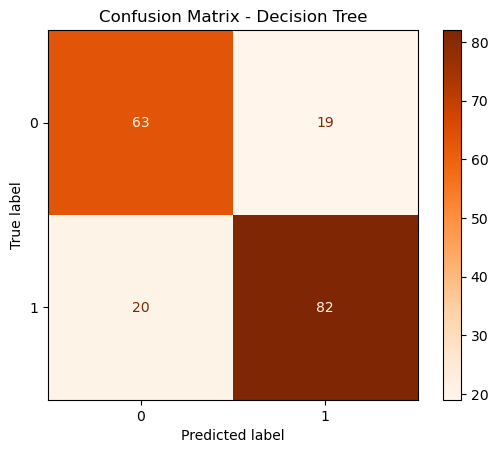

In [31]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=None,
    random_state=42
)

dt.fit(X_train_scaled, y_train)

y_train_pred = dt.predict(X_train_scaled)
y_test_pred = dt.predict(X_test_scaled)
y_test_proba = dt.predict_proba(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_proba[:,1])

cv_scores = cross_val_score(
    dt, X_train_scaled, y_train,
    cv=5, scoring='f1_macro'
)

print("\n===== Decision Tree (Baseline) =====")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")
print(f"Precision (macro) : {precision:.4f}")
print(f"Recall (macro)    : {recall:.4f}")
print(f"F1-Score (macro)  : {f1:.4f}")
print(f"ROC-AUC           : {roc_auc:.4f}")
print(f"CV F1 Macro Mean  : {cv_scores.mean():.4f}")
print(f"CV F1 Macro STD   : {cv_scores.std():.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

## 4.4 Random Forest


===== Random Forest (Baseline) =====
Training Accuracy : 1.0000
Testing Accuracy  : 0.8913
Precision (macro) : 0.8909
Recall (macro)    : 0.8888
F1-Score (macro)  : 0.8897
ROC-AUC           : 0.9299
CV F1 Macro Mean  : 0.8500
CV F1 Macro STD   : 0.0224


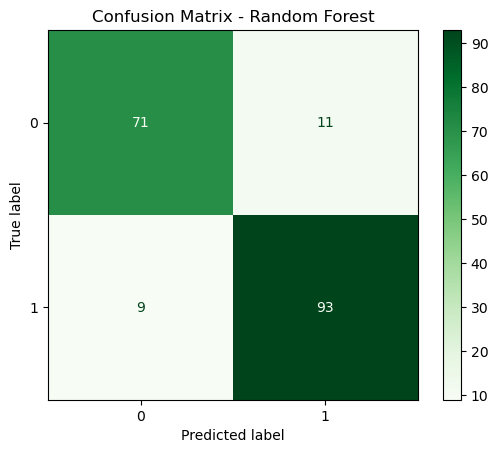

In [32]:
# Random Forest (Baseline)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)

y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)
y_test_proba = rf.predict_proba(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_proba[:,1])

cv_scores = cross_val_score(
    rf, X_train_scaled, y_train,
    cv=5, scoring='f1_macro'
)

print("\n===== Random Forest (Baseline) =====")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")
print(f"Precision (macro) : {precision:.4f}")
print(f"Recall (macro)    : {recall:.4f}")
print(f"F1-Score (macro)  : {f1:.4f}")
print(f"ROC-AUC           : {roc_auc:.4f}")
print(f"CV F1 Macro Mean  : {cv_scores.mean():.4f}")
print(f"CV F1 Macro STD   : {cv_scores.std():.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 4.5 SVM


===== SVM (Baseline) =====
Training Accuracy : 0.8883
Testing Accuracy  : 0.8859
Precision (macro) : 0.8891
Recall (macro)    : 0.8803
F1-Score (macro)  : 0.8834
ROC-AUC           : 0.9256
CV F1 Macro Mean  : 0.8572
CV F1 Macro STD   : 0.0188


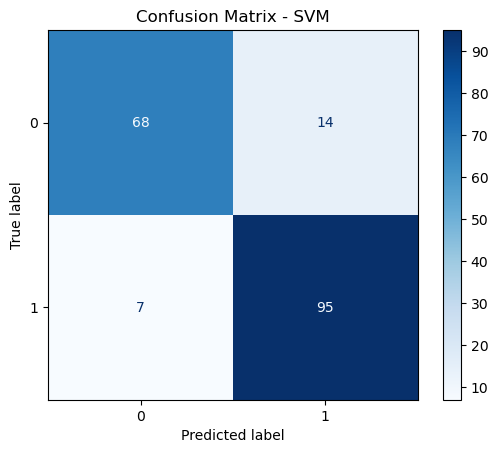

In [33]:
# 4.5 SVM

from sklearn.svm import SVC

svm_model = SVC(
    kernel='rbf',
    probability=True,
    C=1.0
)

svm_model.fit(X_train_scaled, y_train)

y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)
y_test_proba = svm_model.predict_proba(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_proba[:,1])

cv_scores = cross_val_score(
    svm_model, X_train_scaled, y_train,
    cv=5, scoring='f1_macro'
)

print("\n===== SVM (Baseline) =====")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")
print(f"Precision (macro) : {precision:.4f}")
print(f"Recall (macro)    : {recall:.4f}")
print(f"F1-Score (macro)  : {f1:.4f}")
print(f"ROC-AUC           : {roc_auc:.4f}")
print(f"CV F1 Macro Mean  : {cv_scores.mean():.4f}")
print(f"CV F1 Macro STD   : {cv_scores.std():.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()

In [40]:
svm_model = SVC(
    kernel='rbf',
    probability=True,
    C=1.0
)
svm_model.fit(X_train_scaled, y_train)

SVC(probability=True)

## 4.6 Gradient Boositng


===== Gradient Boosting (Baseline) =====
Training Accuracy : 0.9837
Testing Accuracy  : 0.8750
Precision (macro) : 0.8730
Recall (macro)    : 0.8753
F1-Score (macro)  : 0.8739
ROC-AUC           : 0.9366
CV F1 Macro Mean  : 0.8454
CV F1 Macro STD   : 0.0320


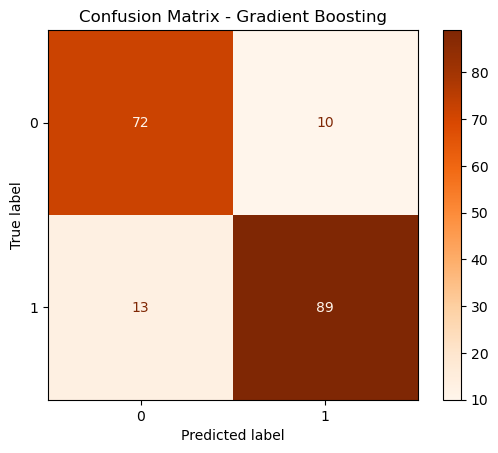

In [34]:
# 4.6 Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb.fit(X_train_scaled, y_train)

y_train_pred = gb.predict(X_train_scaled)
y_test_pred = gb.predict(X_test_scaled)
y_test_proba = gb.predict_proba(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
f1 = f1_score(y_test, y_test_pred, average='macro')
roc_auc = roc_auc_score(y_test, y_test_proba[:,1])

cv_scores = cross_val_score(
    gb, X_train_scaled, y_train,
    cv=5, scoring='f1_macro'
)

print("\n===== Gradient Boosting (Baseline) =====")
print(f"Training Accuracy : {train_acc:.4f}")
print(f"Testing Accuracy  : {test_acc:.4f}")
print(f"Precision (macro) : {precision:.4f}")
print(f"Recall (macro)    : {recall:.4f}")
print(f"F1-Score (macro)  : {f1:.4f}")
print(f"ROC-AUC           : {roc_auc:.4f}")
print(f"CV F1 Macro Mean  : {cv_scores.mean():.4f}")
print(f"CV F1 Macro STD   : {cv_scores.std():.4f}")

cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Oranges")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


# OVERFITTING CHECK

## Function Overfitting Check

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score

def overfit_check(model_name, model, X_train, y_train, X_test, y_test):

    print(f"\n===== Overfitting Check: {model_name} =====\n")

    # === Train & Test Prediction ===
    y_train_pred = model.predict(X_train)
    y_test_pred  = model.predict(X_test)

    # === Metrics ===
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc  = accuracy_score(y_test, y_test_pred)
    acc_gap   = train_acc - test_acc

    train_f1 = f1_score(y_train, y_train_pred, average='macro')
    test_f1  = f1_score(y_test, y_test_pred, average='macro')
    f1_gap   = train_f1 - test_f1

    # === Cross Validation ===
    cv_scores = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring='f1_macro'
    )

    print(f"Training Accuracy : {train_acc:.4f}")
    print(f"Testing Accuracy  : {test_acc:.4f}")
    print(f"Accuracy Gap      : {acc_gap:.4f}\n")

    print(f"Training F1 Macro : {train_f1:.4f}")
    print(f"Testing F1 Macro  : {test_f1:.4f}")
    print(f"F1 Gap            : {f1_gap:.4f}\n")

    print(f"CV F1-Macro Mean  : {cv_scores.mean():.4f}")
    print(f"CV F1-Macro Std   : {cv_scores.std():.4f}")

In [36]:
## Logistic Regression
overfit_check("Logistic Regression",
               logreg, X_train_scaled, y_train, X_test_scaled, y_test)

## KNN
overfit_check("KNN",
               knn, X_train_scaled, y_train, X_test_scaled, y_test)

#3 Decision Tree
overfit_check("Decision Tree",
               dt, X_train_scaled, y_train, X_test_scaled, y_test)

## Random Forest
overfit_check("Random Forest",
               rf, X_train_scaled, y_train, X_test_scaled, y_test)
## SVM
overfit_check("SVM",
               svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

## Gradient Boosting
overfit_check("Gradient Boosting",
               gb, X_train_scaled, y_train, X_test_scaled, y_test)


===== Overfitting Check: Logistic Regression =====

Training Accuracy : 0.8569
Testing Accuracy  : 0.8750
Accuracy Gap      : -0.0181

Training F1 Macro : 0.8552
Testing F1 Macro  : 0.8718
F1 Gap            : -0.0166

CV F1-Macro Mean  : 0.8454
CV F1-Macro Std   : 0.0350

===== Overfitting Check: KNN =====

Training Accuracy : 1.0000
Testing Accuracy  : 0.8804
Accuracy Gap      : 0.1196

Training F1 Macro : 1.0000
Testing F1 Macro  : 0.8787
F1 Gap            : 0.1213

CV F1-Macro Mean  : 0.8331
CV F1-Macro Std   : 0.0204

===== Overfitting Check: Decision Tree =====

Training Accuracy : 1.0000
Testing Accuracy  : 0.7880
Accuracy Gap      : 0.2120

Training F1 Macro : 1.0000
Testing F1 Macro  : 0.7858
F1 Gap            : 0.2142

CV F1-Macro Mean  : 0.7948
CV F1-Macro Std   : 0.0426

===== Overfitting Check: Random Forest =====

Training Accuracy : 1.0000
Testing Accuracy  : 0.8913
Accuracy Gap      : 0.1087

Training F1 Macro : 1.0000
Testing F1 Macro  : 0.8897
F1 Gap            : 0.11

In [37]:
pip install streamlit joblib scikit-learn pandas numpy

Note: you may need to restart the kernel to use updated packages.


In [41]:
import joblib

# simpan scaler
joblib.dump(scaler, "scaler.pkl")

# simpan model SVM
joblib.dump(svm_model, "svm_model.pkl")

print("Berhasil simpan scaler.pkl dan svm_model.pkl")

Berhasil simpan scaler.pkl dan svm_model.pkl
